In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier


data = pd.read_csv('datasets/hydraulic_accumulator.csv')


X = data[['pressure', 'temperature', 'vibration', 'volume_flow', 'Motor_power']]
y = data['hydraulic_accumulator']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded

array([3, 3, 3, ..., 0, 0, 0])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
model = XGBClassifier( eval_metric='mlogloss', random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred_labels = label_encoder.inverse_transform(y_pred)


In [17]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9546485260770975
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       152
           1       0.88      0.93      0.90        75
           2       0.93      0.93      0.93        91
           3       0.99      0.98      0.98       123

    accuracy                           0.95       441
   macro avg       0.95      0.95      0.95       441
weighted avg       0.96      0.95      0.96       441



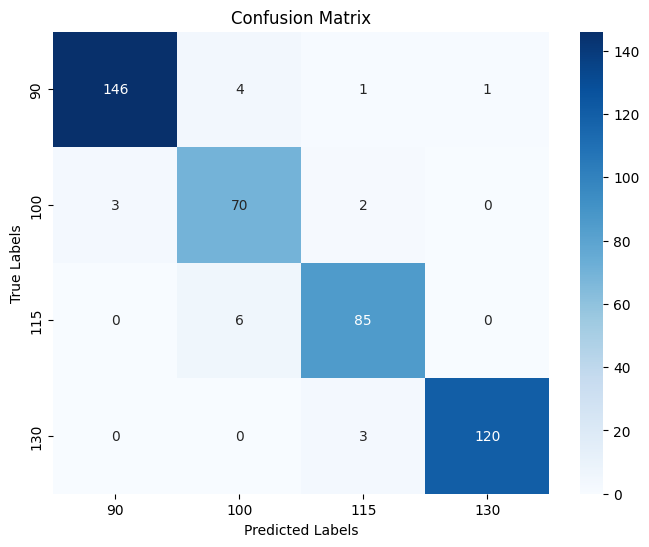

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



In [19]:
import joblib

joblib.dump(model, 'hydraulic_accumulator_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']